In [9]:
# Import pandas
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
# Load in the listings data
df=pd.read_csv('data/listings.csv')

####  Exercise 1: Create a bar chart and dataframe of top 10 Neigborhoods that have the most expensive listsings on average. 
Our goal is to make a chart reflecting the top 10 most expensive Neighborhoods.
This is a little dubious - we assign "expensive" by calculating the average cost of 
an AirBnB in each neighborhood.

1. Make a dataframe that sorts the neighborhood field by decending price.  
1. Use head to cut back top the top 10
1. Use pandas.plot.barh to generate a histogram (see [this](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.barh.html) wiki for details on pandas.plot.barh)
1. Display the data that you used to create the bar chart as a table with neighborhood and average price as the columns.  You want this to match the pivot that you create in youur dashboard

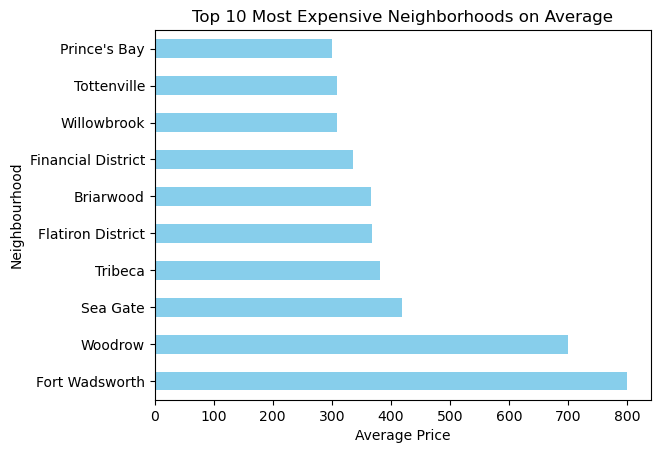

In [12]:
# our goal is to make a chart reflecting the top 10 most expensive Neighborhoods
# This is a little dubious - we assign "expensive" by calculating the average cost of 
# an AirBnB in each neighborhood, then we take the top ten and weight each slice 
# by the average value.
#
# make a dataframe that sorts the neighborhood field by decending price.  
# Use head to cut back top the top 10. Then, use df.plot.barh to generate a histogram.
# Group by neighborhood and calculate the average price
avg_price_per_neighborhood = df.groupby('neighbourhood')['price'].mean().reset_index()
top_10_neighborhoods = avg_price_per_neighborhood.sort_values(by='price', ascending=False).head(10)
top_10_neighborhoods.plot.barh(x='neighbourhood', y='price', legend=False, color='skyblue')
plt.xlabel('Average Price')
plt.ylabel('Neighbourhood')
plt.title('Top 10 Most Expensive Neighborhoods on Average')
plt.show()





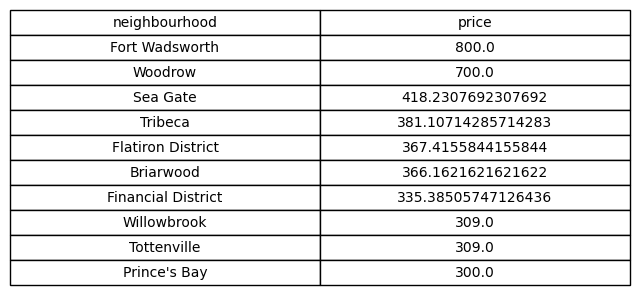

In [20]:
avg_price_per_neighborhood = df.groupby('neighbourhood')['price'].mean().reset_index()

# Sort by price and select top 10 neighborhoods
top_10_neighborhoods = avg_price_per_neighborhood.sort_values(by='price', ascending=False).head(10)

# Create a figure for the table
fig, ax = plt.subplots(figsize=(8, 2))  # Adjust the figure size to fit the table

# Hide the axes for a clean table display
ax.xaxis.set_visible(False) 
ax.yaxis.set_visible(False)
ax.set_frame_on(False)

# Display the DataFrame as a table
table_data = top_10_neighborhoods.values
column_labels = top_10_neighborhoods.columns
table = ax.table(cellText=table_data, colLabels=column_labels, cellLoc='center', loc='center')

# Adjust the layout of the table
table.scale(1, 1.5)  # You can adjust this scaling as needed

plt.show()

####  Exercise 2: Create a bar chart and dataframe of top 10 Neigborhoods that have the LEAST expensive listsings on average. 

Do the same thing you just did, but get the 10 least expensive neighborhoods.  Sort them from lowest average price to highest.  Bew wure to provide a pivot table.

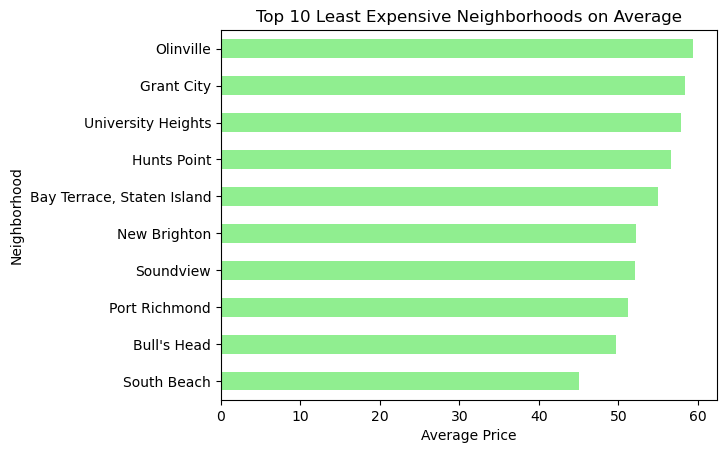

In [14]:
# Here we make the same chart using the bottom 10 Neighborhoods
# by average price.  We sort ascending in this one.
avg_price_per_neighborhood = df.groupby('neighbourhood')['price'].mean().reset_index()

# Sort by ascending price and get the top 10 least expensive neighborhoods
bottom_10_neighborhoods = avg_price_per_neighborhood.sort_values(by='price', ascending=True).head(10)

# Create a horizontal bar chart
bottom_10_neighborhoods.plot.barh(x='neighbourhood', y='price', legend=False, color='lightgreen')

# Add labels and title
plt.xlabel('Average Price')
plt.ylabel('Neighborhood')
plt.title('Top 10 Least Expensive Neighborhoods on Average')

# Display the bar chart
plt.show()




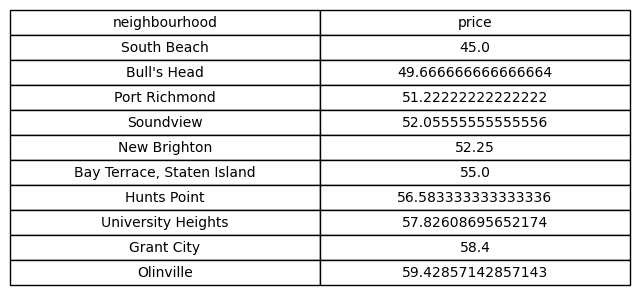

In [23]:
# we also would like to have the corresponding pivot table of the lowest 10
avg_price_per_neighborhood = df.groupby('neighbourhood')['price'].mean().reset_index()

# Sort by ascending price and get the bottom 10 least expensive neighborhoods
bottom_10_neighborhoods = avg_price_per_neighborhood.sort_values(by='price', ascending=True).head(10)

# Create a figure for the table
fig, ax = plt.subplots(figsize=(8, 2))  # Adjust the figure size to fit the table

# Hide the axes for a clean table display
ax.xaxis.set_visible(False)
ax.yaxis.set_visible(False)
ax.set_frame_on(False)

# Display the DataFrame as a table
table_data = bottom_10_neighborhoods.values
column_labels = bottom_10_neighborhoods.columns
table = ax.table(cellText=table_data, colLabels=column_labels, cellLoc='center', loc='center')

# Adjust the layout of the table
table.scale(1, 1.5)  # You can adjust this scaling as needed

plt.show()
df.to_csv('neighborhood_prices.csv', index=False)



#  Now make all four widgets (the two charts and the two dataframes) in a Tableau dashboard!